In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
iris = datasets.load_iris()

In [3]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])

In [4]:
# Let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# Standardize features
X = iris.iloc[:,:3] # independent variables
y = iris.species # dependent variable
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


In [6]:
# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [7]:
# Show cluster membership
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [8]:
# Print Accuracy and Classification Report
iris['pred_species'] = model.labels_
print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print ("Classifiation report :", metrics.classification_report(iris.species,
iris.pred_species))

Accuracy : 0.7733333333333333
Classifiation report :               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        50
         1.0       0.64      0.74      0.69        50
         2.0       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



In [9]:
# Produce dendrogram
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [10]:
# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

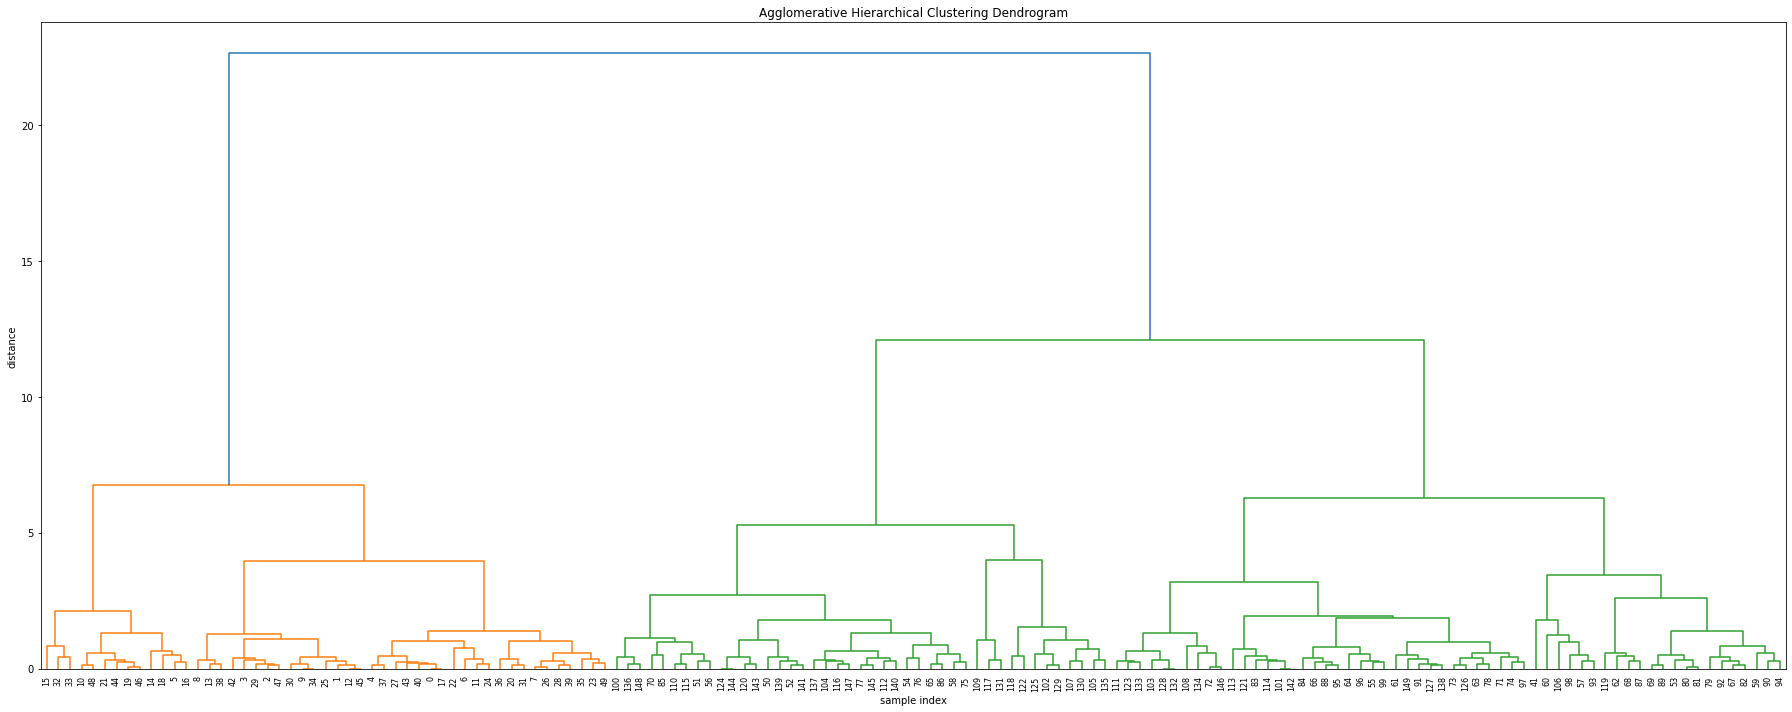

In [12]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
Z,
leaf_rotation=90., # rotates the x axis labels
leaf_font_size=8., # font size for the x axis labels
)
plt.tight_layout()